正在生成数据 (N=500000000)...


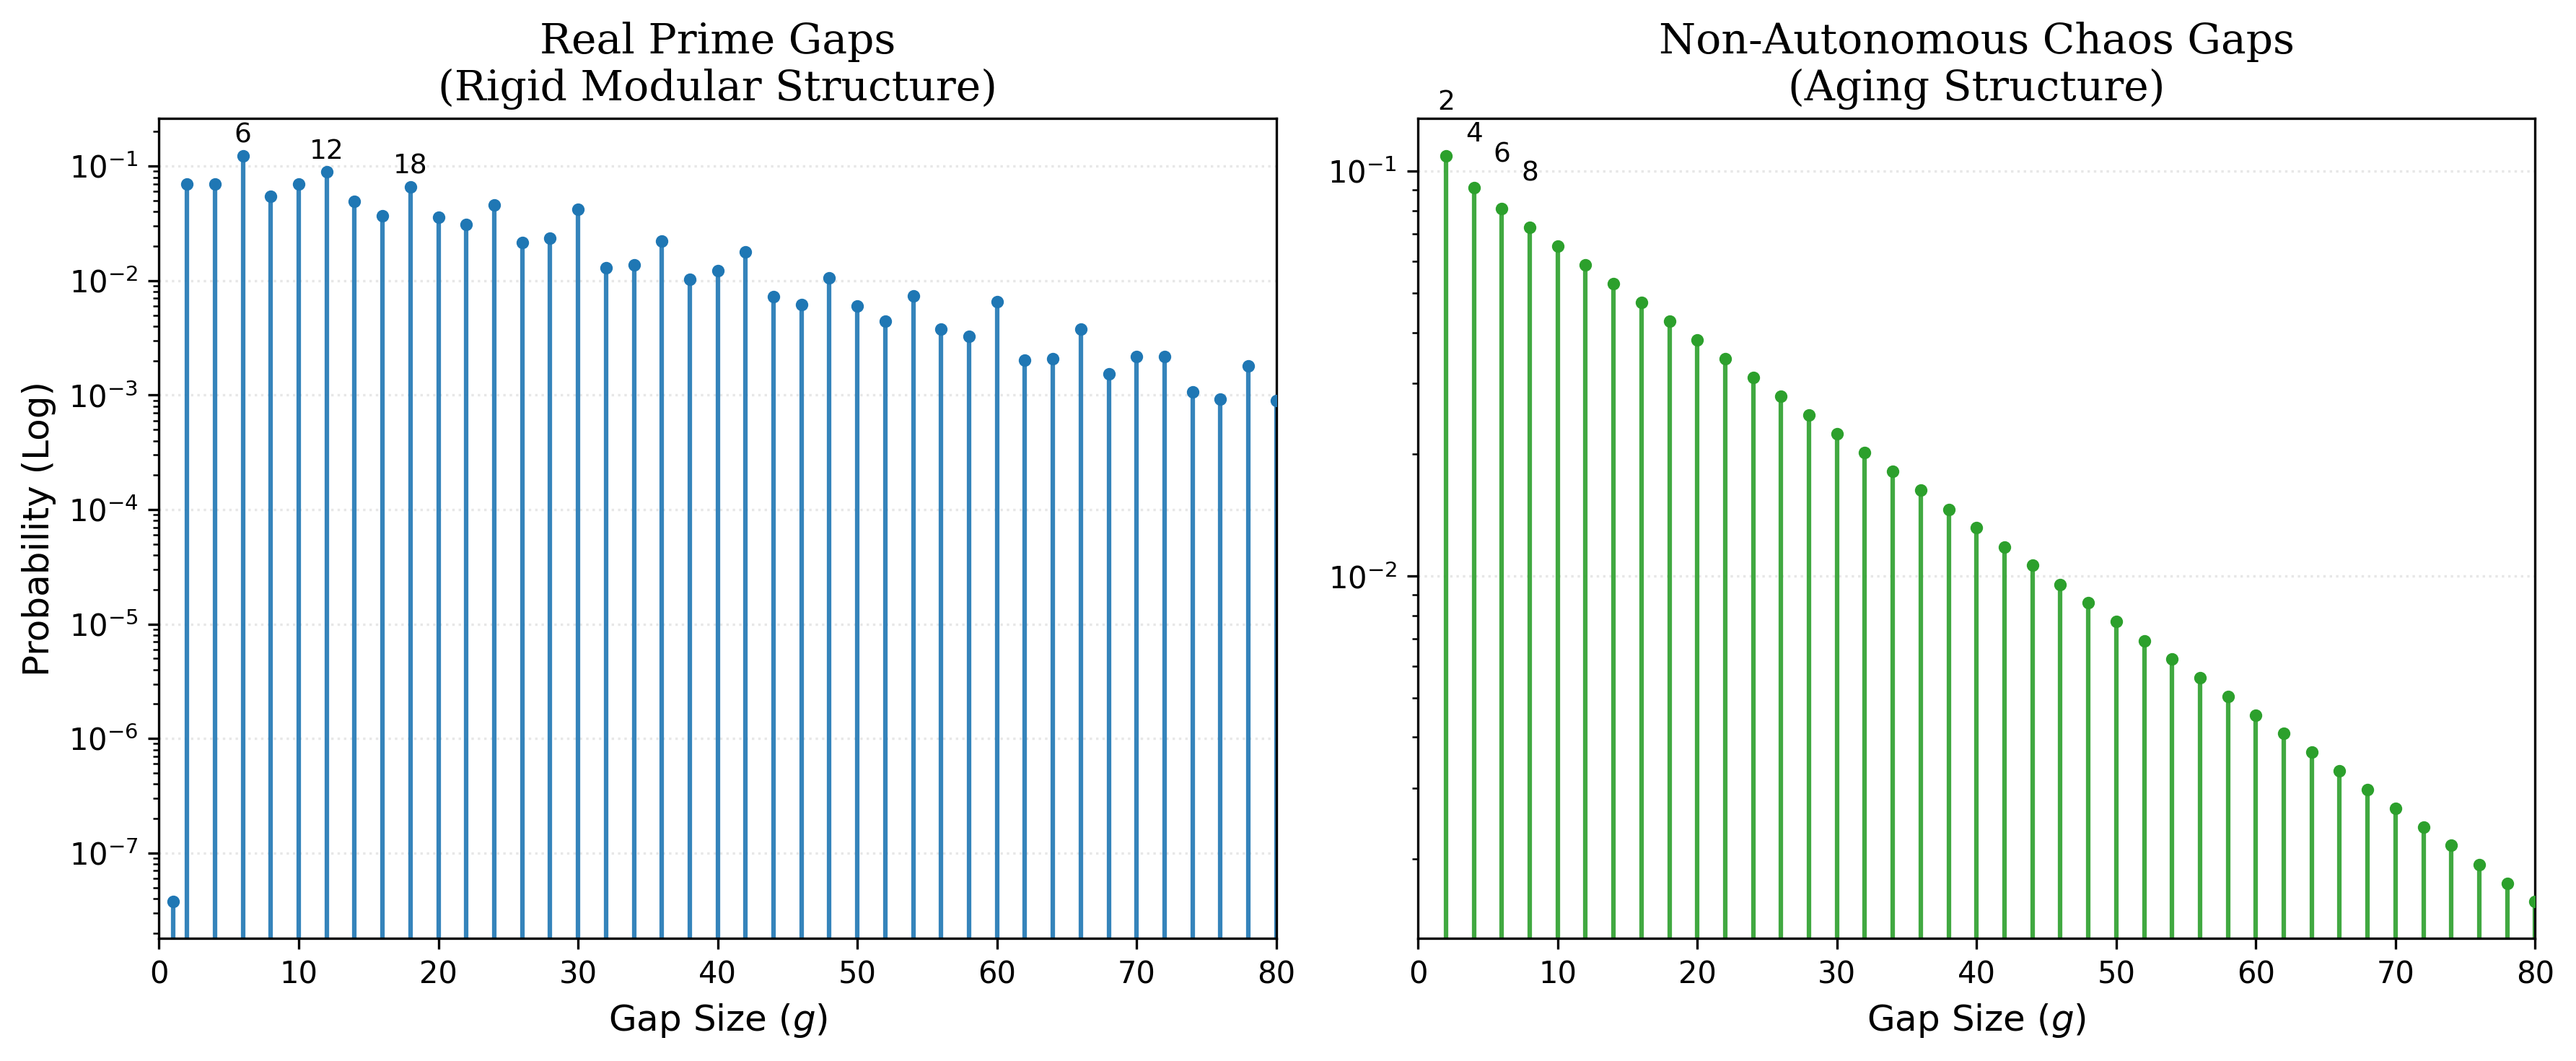

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_aging_gap_comparison(limit=500000000):
    print(f"正在生成数据 (N={limit})...")
    
    # 1. 真实素数 (Real Primes)
    is_prime = np.ones(limit + 1, dtype=bool)
    is_prime[0:2] = False
    for i in range(2, int(limit**0.5) + 1):
        if is_prime[i]:
            is_prime[i*i : limit+1 : i] = False
    primes = np.nonzero(is_prime)[0]
    real_gaps = np.diff(primes)
    
    # 2. 非自治(老化)混沌 (Non-autonomous Chaos)
    # 这一步比静态要慢，因为我们要模拟筛选过程
    u = 1.543689012692076
    x = 0.1
    for _ in range(10000): x = 1 - u * x**2
    
    aging_indices = []
    # 缩放因子 k，用于对齐素数定理 (k ~ 4.55)
    k = 4.55 
    
    # 我们运行更多步数，以获得足够的间隙样本
    # 因为老化会让点变少
    run_steps = limit * 2 
    
    x_curr = x
    for n in range(1, run_steps):
        x_curr = 1 - u * x_curr**2
        
        if x_curr < 0: # 落在 L 区域
            # 非自治核心：老化筛选
            # P = k / ln(n)
            # 避免 n=1 时 log(1)=0 报错
            if n > 2:
                prob = k / np.log(n)
                # 蒙特卡洛判定
                if np.random.random() < prob:
                    aging_indices.append(n)
                    
    aging_gaps = np.diff(aging_indices)

    # --- 核心处理：统计离散频率 ---
    def get_spectrum(data, max_val=80):
        counts = np.bincount(data)
        if len(counts) > max_val:
            counts = counts[:max_val+1]
        # 归一化
        probs = counts / len(data)
        x_axis = np.arange(len(probs))
        return x_axis, probs

    x_real, y_real = get_spectrum(real_gaps)
    x_aging, y_aging = get_spectrum(aging_gaps)

    # --- 3. 绘图 (简洁版) ---
    plt.figure(figsize=(12, 5), dpi=300)
    
    # 子图1：真实素数
    plt.subplot(1, 2, 1)
    plt.vlines(x_real, 0, y_real, colors='#1f77b4', lw=1.5, alpha=0.9)
    plt.scatter(x_real, y_real, s=10, color='#1f77b4', zorder=3)
    
    plt.yscale('log')
    plt.title('Real Prime Gaps\n(Rigid Modular Structure)', fontsize=14, fontfamily='serif')
    plt.xlabel('Gap Size ($g$)', fontsize=12)
    plt.ylabel('Probability (Log)', fontsize=12)
    plt.xlim(0, 80)
    plt.grid(True, axis='y', ls=':', alpha=0.3)
    
    # 标注显著峰 (6k)
    for p in [6, 12, 18]:
        if p < len(y_real):
            plt.text(p, y_real[p]*1.3, str(p), ha='center', fontsize=9, color='black')

    # 子图2：非自治混沌
    plt.subplot(1, 2, 2)
    # 使用绿色代表"进化/老化"后的模型
    plt.vlines(x_aging, 0, y_aging, colors='#2ca02c', lw=1.5, alpha=0.9)
    plt.scatter(x_aging, y_aging, s=10, color='#2ca02c', zorder=3)
    
    plt.yscale('log')
    plt.title('Non-Autonomous Chaos Gaps\n(Aging Structure)', fontsize=14, fontfamily='serif')
    plt.xlabel('Gap Size ($g$)', fontsize=12)
    plt.xlim(0, 80)
    # 保持Y轴范围一致方便对比
    plt.ylim(plt.ylim()) 
    plt.grid(True, axis='y', ls=':', alpha=0.3)
    
    # 标注混沌峰值
    top_idx = np.argsort(y_aging)[-4:]
    for p in top_idx:
        if p > 0 and y_aging[p] > 1e-4:
            plt.text(p, y_aging[p]*1.3, str(p), ha='center', fontsize=9, color='black')

    plt.tight_layout()
    plt.savefig('aging_gap_comparison.png')
    plt.show()

plot_aging_gap_comparison()